In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


In [2]:
def U(x):
    return np.abs(x-2)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:45<00:00, 109.90it/s]


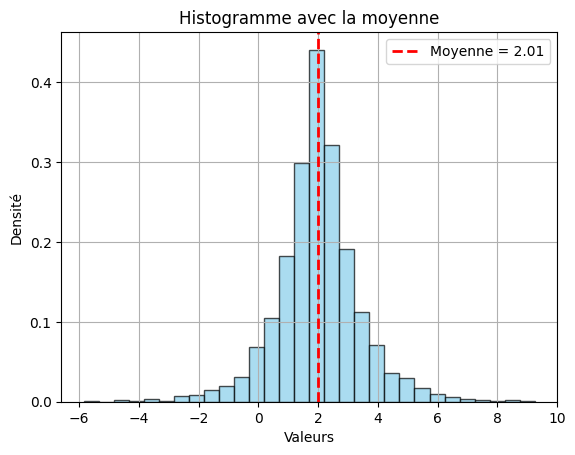

In [ ]:
if __name__ == "__main__":
    v = 1
    x_init = 20
    n_iter = 1000
    n_points = 5000
    samples  = np.array([metropolis_sampler(x_init, v, U, n_iter)[-1] for _ in tqdm(range(n_points))])

    plt.hist(samples, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    mean_value = np.mean(samples) 

    # Afficher
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne = {mean_value:.2f}')

# Ajouter titre et légende
    plt.title("Histogramme avec la moyenne")
    plt.xlabel("Valeurs")
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
def gaussian_potential(x, m, v):
    return (x-m)**2/(2*v)

def coupling_gaussian(m1, m2, v):
    x = np.random.normal(m1, v)
    log_w = np.log(np.random.uniform(0,1))
    if log_w <= gaussian_potential(x, m1, v) - gaussian_potential(x, m2, v):
        return x, x
    else:
        y = np.random.normal(m2, v)
        log_w = np.log(np.random.uniform(0,1))
        while log_w <= gaussian_potential(y, m2, v) - gaussian_potential(y, m1, v):
            y = np.random.normal(m2, v)
            log_w = np.log(np.random.uniform(0,1))
        
        return x, y


def MH_coupling_step(x, y, v, U):
    #print('before coupling', (x, y))
    proposal_x, proposal_y = coupling_gaussian(x, y, v) 
    #print('proposals', (proposal_x, proposal_y))

    log_w = np.log(np.random.uniform(0, 1))
    if log_w < U(x) - U(proposal_x):
        x = proposal_x
    if log_w < U(y) - U(proposal_y):
        y = proposal_y
    #print('aftre coupling', (x, y))
    return x, y

def MH_couplig(x_init, y_init, v, U, n_iter):
    samples = [(x_init, y_init)]
    x, y = x_init, y_init
    for _ in tqdm(range(n_iter)):
        x, y = MH_coupling_step(x, y, v, U)
        samples.append((x, y))
        #print('in samples', (x,y))
    return samples

In [22]:
if __name__ == "__main__":
    v = 1
    x_init = 20
    y_init = 10
    n_iter = 500

    samples  = MH_couplig(x_init, y_init, v, U, n_iter)

    x_samples = [samples[i][0] for i in range(n_iter)]
    y_samples = [samples[i][1] for i in range(n_iter)]

    meet_time = []

    for i in range(n_iter):
        if x_samples[i] == y_samples[i]:
            meet_time.append(i)


100%|██████████| 500/500 [00:00<00:00, 52556.25it/s]


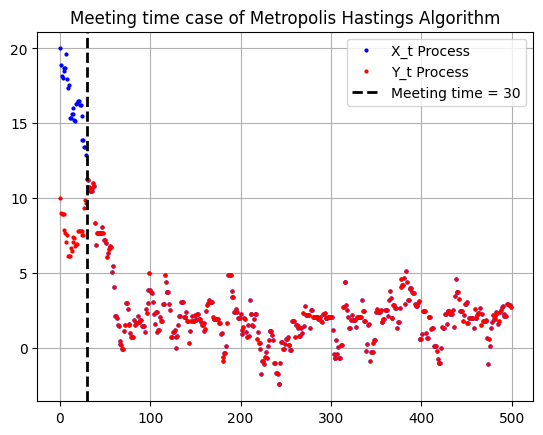

In [33]:
plt.plot(x, x_samples, marker='o', linestyle='None', markersize=2, color='blue', label = 'X_t Process')
plt.plot(x, y_samples, marker='o', linestyle='None', markersize=2, color='red', label = 'Y_t Process')
plt.axvline(meet_time[0], color='black', linestyle='dashed', linewidth=2, label=f'Meeting time = {meet_time[0]}')
plt.title("Meeting time case of Metropolis Hastings Algorithm")
plt.grid(True)
plt.legend()  # Affiche la légende
plt.show()